In [1]:
import pandas as pd

In [3]:
filename = '../datasets/ca-500.csv'

# # windows
# filename = '..\\datasets\\ca-500.csv'
# filename = r'..\datasets\ca-500.csv'

In [8]:
df = pd.read_csv(filename, dtype='string')
df.head()

,first_name,last_name,company_name,address,city,province,postal,phone1,phone2,email,web,date_of_birth
0,Francoise,Kohlman,"Riebesell, H F Jr",2335 Canton Hwy #6,Windsor,ON,N8N 3N2,519-569-8399,519-978-6179,f.kohlman@hotmail.com,http://www.riebesellhfjr.com,1970-11-05
1,Kendra,Yandow,Deloitte & Touche,6 Arch St #9757,Alcida,NB,E8J 2C4,506-363-1526,506-932-4472,kendray@cox.net,http://www.deloittetouche.com,1960-02-17
2,Lourdes,Beliles,Oklahoma Neon Inc,9547 Belmont Rd #21,Belleville,ON,K8P 1B3,613-903-7043,613-638-6682,l.beliles@gmail.com,http://www.oklahomaneoninc.com,2001-12-18
3,Hannah,Helmcamp,M B A Paint Stores,73 Pittsford Victor Rd,Vancouver,BC,V5Z 3K2,604-334-3686,604-692-7694,hannah.helmcamp@helmcamp.org,http://www.mbapaintstores.com,1955-09-20
4,Tom,Sport,Sheraton Shreveport Hotel,447 Commercial St Se,LIle-Perrot,QC,J7V 4T4,514-487-6096,514-727-4760,tom_sport@aol.com,http://www.sheratonshreveporthotel.com,1952-08-20


### EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_name     500 non-null    string
 1   last_name      500 non-null    string
 2   company_name   500 non-null    string
 3   address        500 non-null    string
 4   city           500 non-null    string
 5   province       500 non-null    string
 6   postal         500 non-null    string
 7   phone1         500 non-null    string
 8   phone2         500 non-null    string
 9   email          490 non-null    string
 10  web            500 non-null    string
 11  date_of_birth  500 non-null    string
dtypes: string(12)
memory usage: 47.0 KB


In [14]:
df.loc[df['email'].isna(), ['first_name', 'last_name', 'city', 'email']]

,first_name,last_name,city,email
207,Long,Lehn,Blainville,<NA>
209,Lucia,Weekly,Scarborough,<NA>
215,Nickie,Marrano,North Vancouver,<NA>
258,Bethanie,Pritt,Cambridge,<NA>
281,Sina,Norcia,Etobicoke,<NA>
319,Shanice,Vosmus,Kingston,<NA>
323,Essie,Montalgo,Welshpool,<NA>
422,Verona,Staiano,Montreal,<NA>
425,Nan,Shufelt,London,<NA>
487,Annice,Wykle,Victoria,<NA>


In [15]:
df.loc[df['city']=='Montreal', ['first_name', 'last_name', 'city', 'email']]

,first_name,last_name,city,email
67,Mammie,Masiejczyk,Montreal,mammie.masiejczyk@cox.net
109,Tesha,Purslow,Montreal,tesha.purslow@purslow.com
233,Harris,Elmquist,Montreal,helmquist@elmquist.com
236,Maddie,Tapian,Montreal,maddie.tapian@aol.com
239,Steffanie,Palenik,Montreal,s.palenik@palenik.com
315,Val,Tijerina,Montreal,val.tijerina@cox.net
350,Denny,Gilliam,Montreal,dennyg@cox.net
411,Luann,Tibbles,Montreal,luann_tibbles@cox.net
422,Verona,Staiano,Montreal,<NA>
424,Rikki,Groom,Montreal,r.groom@groom.org


In [21]:
df_selected = df[['first_name', 'last_name', 'city', 'email']].query('city=="Montreal"').copy()
df_selected

,first_name,last_name,city,email
67,Mammie,Masiejczyk,Montreal,mammie.masiejczyk@cox.net
109,Tesha,Purslow,Montreal,tesha.purslow@purslow.com
233,Harris,Elmquist,Montreal,helmquist@elmquist.com
236,Maddie,Tapian,Montreal,maddie.tapian@aol.com
239,Steffanie,Palenik,Montreal,s.palenik@palenik.com
315,Val,Tijerina,Montreal,val.tijerina@cox.net
350,Denny,Gilliam,Montreal,dennyg@cox.net
411,Luann,Tibbles,Montreal,luann_tibbles@cox.net
422,Verona,Staiano,Montreal,<NA>
424,Rikki,Groom,Montreal,r.groom@groom.org


In [20]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 67 to 483
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  12 non-null     string
 1   last_name   12 non-null     string
 2   city        12 non-null     string
 3   email       11 non-null     string
dtypes: string(4)
memory usage: 480.0 bytes


In [22]:
df_selected.count()

first_name    12
last_name     12
city          12
email         11
dtype: int64

In [26]:
df['province'].value_counts()

province
ON    175
QC    116
BC     72
AB     42
NB     30
NS     23
SK     21
MB     12
NL      8
PE      1
Name: count, dtype: Int64

In [39]:
df.groupby(by='province').agg('size')

province
AB     42
BC     72
MB     12
NB     30
NL      8
NS     23
ON    175
PE      1
QC    116
SK     21
dtype: int64

<Axes: ylabel='province'>

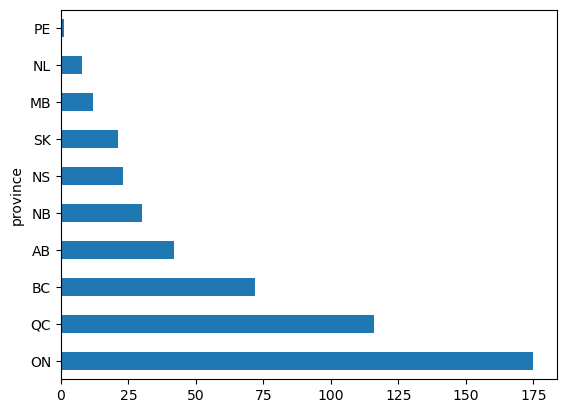

In [27]:
df['province'].value_counts().plot(kind='barh')

In [43]:
canada_provinces = {
    "AB": "Alberta",
    "BC": "British Columbia",
    "MB": "Manitoba",
    "NB": "New Brunswick",
    "NL": "Newfoundland and Labrador",
    "NS": "Nova Scotia",
    "ON": "Ontario",
    "PE": "Prince Edward Island",
    "QC": "Quebec",
    "SK": "Saskatchewan",
}

In [30]:
df['province_name'] = df['province'].replace(canada_provinces)

In [31]:
df

,first_name,last_name,company_name,address,city,province,postal,phone1,phone2,email,web,date_of_birth,province_name
0,Francoise,Kohlman,"Riebesell, H F Jr",2335 Canton Hwy #6,Windsor,ON,N8N 3N2,519-569-8399,519-978-6179,f.kohlman@hotmail.com,http://www.riebesellhfjr.com,1970-11-05,Ontario
1,Kendra,Yandow,Deloitte & Touche,6 Arch St #9757,Alcida,NB,E8J 2C4,506-363-1526,506-932-4472,kendray@cox.net,http://www.deloittetouche.com,1960-02-17,New Brunswick
2,Lourdes,Beliles,Oklahoma Neon Inc,9547 Belmont Rd #21,Belleville,ON,K8P 1B3,613-903-7043,613-638-6682,l.beliles@gmail.com,http://www.oklahomaneoninc.com,2001-12-18,Ontario
3,Hannah,Helmcamp,M B A Paint Stores,73 Pittsford Victor Rd,Vancouver,BC,V5Z 3K2,604-334-3686,604-692-7694,hannah.helmcamp@helmcamp.org,http://www.mbapaintstores.com,1955-09-20,British Columbia
4,Tom,Sport,Sheraton Shreveport Hotel,447 Commercial St Se,LIle-Perrot,QC,J7V 4T4,514-487-6096,514-727-4760,tom_sport@aol.com,http://www.sheratonshreveporthotel.com,1952-08-20,Quebec
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Erin,Lafoy,Curtiss Wright Corp,357 W Mount Royal Ave,Longueuil,QC,J4M 2A8,450-316-7813,450-491-8703,erin.lafoy@aol.com,http://www.curtisswrightcorp.com,1975-11-29,Quebec
496,Kassandra,Batdorf,Phelps Tool & Die Co Inc,123 Euclid Ave #9396,Nanaimo,BC,V9R 1C9,250-646-6446,250-571-5058,k.batdorf@batdorf.com,http://www.phelpstooldiecoinc.com,1957-12-09,British Columbia
497,Leslee,Bredernitz,Factory Mattress Outlet,1251 E Main St #990,Quebec,QC,G1H 1A6,418-460-5773,418-543-9015,l.bredernitz@yahoo.com,http://www.factorymattressoutlet.com,1976-07-06,Quebec
498,Daniel,Cisney,Cosgroves N End Plbg & Hdwr Co,259 W 17th St #39,Beresford,NB,E8K 1B7,506-617-2607,506-951-8403,danielc@cox.net,http://www.cosgrovesnendplbghdwrco.com,1961-12-08,New Brunswick


<Axes: ylabel='province_name'>

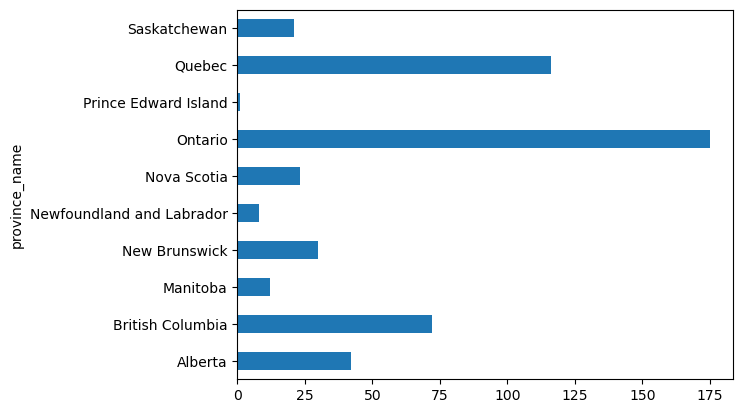

In [33]:
df['province_name'].value_counts().sort_index().plot(kind='barh')

In [47]:
df_provinces = pd.DataFrame(canada_provinces.items(), columns=['abbr', 'name'])
df_provinces

,abbr,name
0,AB,Alberta
1,BC,British Columbia
2,MB,Manitoba
3,NB,New Brunswick
4,NL,Newfoundland and Labrador
5,NS,Nova Scotia
6,ON,Ontario
7,PE,Prince Edward Island
8,QC,Quebec
9,SK,Saskatchewan


In [50]:
df2 = df[['first_name', 'last_name', 'province', 'city']]
df2

,first_name,last_name,province,city
0,Francoise,Kohlman,ON,Windsor
1,Kendra,Yandow,NB,Alcida
2,Lourdes,Beliles,ON,Belleville
3,Hannah,Helmcamp,BC,Vancouver
4,Tom,Sport,QC,LIle-Perrot
...,...,...,...,...
495,Erin,Lafoy,QC,Longueuil
496,Kassandra,Batdorf,BC,Nanaimo
497,Leslee,Bredernitz,QC,Quebec
498,Daniel,Cisney,NB,Beresford


In [53]:
df2 = df2.merge(df_provinces, how='left', left_on='province', right_on='abbr').drop('abbr', axis=1)

In [58]:
df.sort_values(['province', 'city', 'last_name'], ascending=[False, True, False])

,first_name,last_name,company_name,address,city,province,postal,phone1,phone2,email,web,date_of_birth,province_name
61,Eura,Reider,Graphic Color Litho Inc,9 N Monroe St,Lloydminster,SK,S9V 0C6,306-979-2571,306-813-8269,e.reider@aol.com,http://www.graphiccolorlithoinc.com,2001-03-12,Saskatchewan
390,Stephanie,Kasperek,Gaber Nyman & Co,45 S Cedar Ridge Dr,Lloydminster,SK,S9V 1T4,306-510-5011,306-312-8273,stephanie_kasperek@yahoo.com,http://www.gabernymanco.com,1969-04-25,Saskatchewan
18,Valentin,Chreene,General Color Co Inc,6185 Bohn St #72,Pangman,SK,S0C 2C0,306-291-5073,306-316-7477,v.chreene@aol.com,http://www.generalcolorcoinc.com,1973-07-29,Saskatchewan
394,Louvenia,Nickelson,L M Mccown & Son Co,6 Friendship Dr #5055,Prince Albert,SK,S6V 6A4,306-256-9309,306-636-7201,lnickelson@aol.com,http://www.lmmccownsonco.com,1984-05-06,Saskatchewan
157,Frank,Dudash,Interlink Marketing Inc,462 2nd St,Prince Albert,SK,S6V 6E5,306-653-1772,306-265-2144,fdudash@dudash.com,http://www.interlinkmarketinginc.com,2001-10-27,Saskatchewan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Danilo,Dicus,Harry L Adams Incorporated,6857 Wall St,Red Deer,AB,T4R 2H5,403-212-4945,403-888-9985,d.dicus@yahoo.com,http://www.harryladamsincorporated.com,1964-10-24,Alberta
433,Ilda,Suero,Secaucus Guide Book,80 Ringwood Ave #7,St. Albert,AB,T8N 1L5,780-830-2958,780-287-2408,i.suero@yahoo.com,http://www.secaucusguidebook.com,1974-01-01,Alberta
363,William,Pacholec,"Boland, William T Jr",1434 Ash St,Trochu,AB,T0M 2C0,403-251-6126,403-444-7192,william.pacholec@aol.com,http://www.bolandwilliamtjr.com,1963-04-07,Alberta
444,Milly,Coin,"Schell, Eric F Esq",20 Fort Campbell Blvd #4792,Wetaskiwin,AB,T9A 3K1,780-799-6418,780-944-4851,milly_coin@aol.com,http://www.schellericfesq.com,1961-06-04,Alberta


In [79]:
pd.pivot_table(df,
               columns='province',
               index='city',
               aggfunc='size',
               fill_value=0
).replace({0:'.'})

province,AB,BC,MB,NB,NL,NS,ON,PE,QC,SK
city,,,,,,,,,,
Abbotsford,.,3,.,.,.,.,.,.,.,.
Ajax,.,.,.,.,.,.,3,.,.,.
Albanel,.,.,.,.,.,.,.,.,1,.
Alcida,.,.,.,1,.,.,.,.,.,.
Alma,.,.,.,.,.,.,.,.,3,.
Amherst,.,.,.,.,.,2,.,.,.,.
Amherstburg,.,.,.,.,.,.,1,.,.,.
Amos,.,.,.,.,.,.,.,.,1,.
Amqui,.,.,.,.,.,.,.,.,1,.


In [62]:
pd.set_option('display.max_rows', None)